## Observations and Insights

Three Observations:
1. The average tumbor volume increased as weight increased under the Capomulin regimen.
2. For mouse b128 the Capomulin regimen decreased the tumor volume over time.
3. More males were tested under the treatment regimens than females.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data_df = mouse_metadata.merge(study_results, on='Mouse ID')
mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

In [3]:
drug_summary_df = mouse_data_df.groupby(['Drug Regimen'])

drug_summary_df.count().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [4]:
mean_drug = drug_summary_df["Tumor Volume (mm3)"].mean()
mean_drug.head()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [5]:
median_drug = drug_summary_df["Tumor Volume (mm3)"].median()
median_drug.head()

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Name: Tumor Volume (mm3), dtype: float64

In [6]:
variance_drug = drug_summary_df["Tumor Volume (mm3)"].var()
variance_drug.head()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64

In [7]:
standard_deviation_drug = drug_summary_df["Tumor Volume (mm3)"].std()
standard_deviation_drug.head()

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Name: Tumor Volume (mm3), dtype: float64

In [8]:
sem_drug = drug_summary_df["Tumor Volume (mm3)"].sem()
sem_drug.head()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Name: Tumor Volume (mm3), dtype: float64

In [9]:
summary_statistics_table_df = pd.DataFrame({"Mean Tumor Volume (mm3)": mean_drug,
                                            "Median Tumor Volume (mm3)": median_drug,
                                            "Variance Tumor Volume (mm3)": variance_drug,
                                            "Standard Deviation Tumor Volume (mm3)": standard_deviation_drug,
                                            "SEM Tumor Volume (mm3)": sem_drug})
summary_statistics_table_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


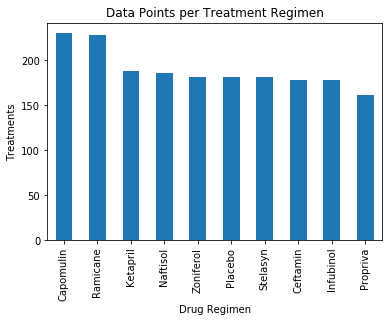

<Figure size 432x288 with 0 Axes>

In [11]:
drug_regimen = mouse_data_df['Drug Regimen'].value_counts()


drug_chart = drug_regimen.plot(kind="bar", title="Data Points per Treatment Regimen")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Treatments")

plt.show()
plt.tight_layout()

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
treatment_mice = mouse_data_df['Drug Regimen'].value_counts()
treatment_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [14]:
treatment_table_df = pd.DataFrame({"Treatments": treatment_mice
})
treatment_table_df.head()

,Treatments
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182


In [15]:
reset_index = treatment_table_df.reset_index()
reset_index

,index,Treatments
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,161


In [16]:
x_axis = np.arange(len(reset_index))
tick_locations = [value for value in x_axis]

Text(0, 0.5, 'Treatments')

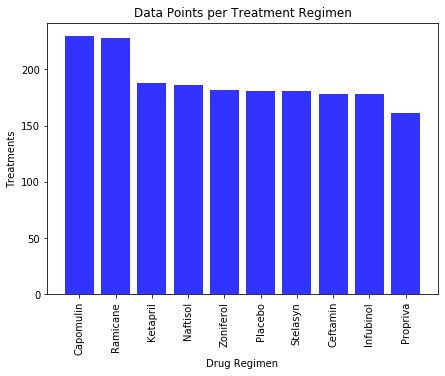

In [17]:
plt.figure(figsize=(7,5))
plt.bar(x_axis, reset_index["Treatments"], color='b', alpha=.8, align="center")
plt.xticks(tick_locations, reset_index["index"], rotation="vertical")

plt.title("Data Points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Treatments")

## Pie plots

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


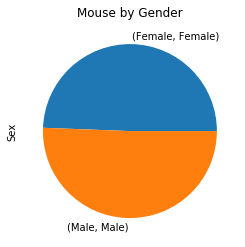

In [19]:
gender_groups = mouse_data_df.groupby('Sex')

gender_mice = gender_groups['Sex'].value_counts()

gender_chart = gender_mice.plot(kind="pie", title="Mouse by Gender")


plt.show()

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# gender_groups = mouse_data_df.groupby('Sex')

gender_mice = mouse_data_df['Sex'].value_counts().astype(float)
gender_mice

Male      958.0
Female    935.0
Name: Sex, dtype: float64

In [22]:
gender_table_df = pd.DataFrame({"Gender Count": gender_mice})
gender_table_df

,Gender Count
Male,958.0
Female,935.0


In [23]:
reset_gender_index = gender_table_df.reset_index()
reset_gender_index

,index,Gender Count
0,Male,958.0
1,Female,935.0


/Users/sarahparzyck/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show(*args, **kw)>

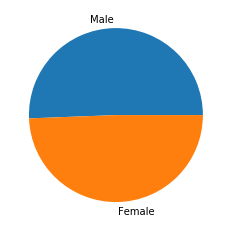

In [24]:
plt.pie(gender_table_df, labels=reset_gender_index['index'])
plt.show

## Quartiles, outliers and boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the most 
#promising treatment regimens. 

In [26]:
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
last_volume_df = mouse_data_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Mouse ID"]).last()
last_volume_df

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a262,Placebo,70.717621
a275,Ceftamin,62.999356
a366,Stelasyn,63.440686
...,...,...
z435,Propriva,48.710661
z578,Ramicane,30.638696
z581,Infubinol,62.754451


In [28]:
capomulin_df = last_volume_df.loc[last_volume_df["Drug Regimen"] == "Capomulin", :]
capomulin_df.head()

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
b128,Capomulin,38.982878
b742,Capomulin,38.939633
f966,Capomulin,30.485985
g288,Capomulin,37.074024
g316,Capomulin,40.159220


In [29]:
ramicane_df = last_volume_df.loc[last_volume_df["Drug Regimen"] == "Ramicane", :]
ramicane_df.head()

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
a411,Ramicane,38.407618
a444,Ramicane,43.047543
a520,Ramicane,38.810366
a644,Ramicane,32.978522
c458,Ramicane,38.342008


In [30]:
infubinol_df = last_volume_df.loc[last_volume_df["Drug Regimen"] == "Infubinol", :]
infubinol_df.head()

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a577,Infubinol,57.031862
a685,Infubinol,66.083066
c139,Infubinol,72.226731


In [31]:
ceftamin_df = last_volume_df.loc[last_volume_df["Drug Regimen"] == "Ceftamin", :]
ceftamin_df.head()

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
a275,Ceftamin,62.999356
b447,Ceftamin,45.000000
b487,Ceftamin,56.057749
b759,Ceftamin,55.742829
f436,Ceftamin,48.722078


In [32]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

campomulin = capomulin_df['Tumor Volume (mm3)']

quartiles = campomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Campomulin is: {lowerq}")
print(f"The upper quartile of Campomulin is: {upperq}")
print(f"The interquartile range of Campomulin is: {iqr}")
print(f"The the median of Campomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Campomulin is: 32.37735684
The upper quartile of Campomulin is: 40.1592203
The interquartile range of Campomulin is: 7.781863460000004
The the median of Campomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


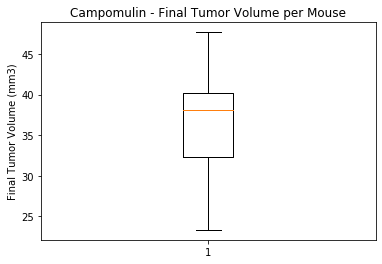

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Campomulin - Final Tumor Volume per Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(campomulin)
plt.show()

In [35]:
ramicane = ramicane_df['Tumor Volume (mm3)']

quartiles = ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


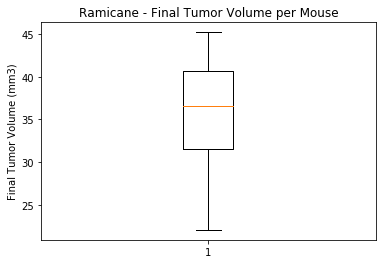

In [36]:
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane - Final Tumor Volume per Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ramicane)
plt.show()

In [37]:
infubinol = infubinol_df['Tumor Volume (mm3)']

quartiles = infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


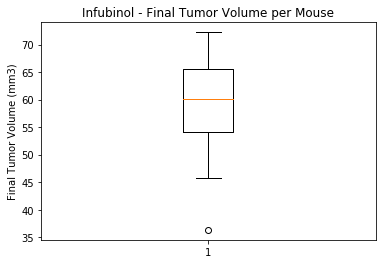

In [38]:
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol - Final Tumor Volume per Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(infubinol)
plt.show()

In [43]:
ceftamin = ceftamin_df['Tumor Volume (mm3)']

quartiles = ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


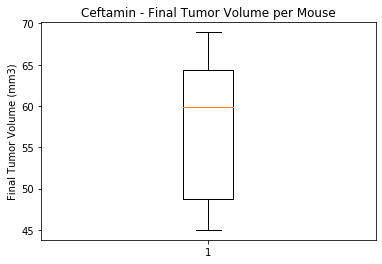

In [44]:
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin - Final Tumor Volume per Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ceftamin)
plt.show()

## Line and scatter plots

In [59]:
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse_df = mouse_data_df.loc[mouse_data_df["Mouse ID"] == "b128", :]
capomulin_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


In [61]:
timepoint = capomulin_mouse_df['Timepoint']

tumor_volume = capomulin_mouse_df['Tumor Volume (mm3)']

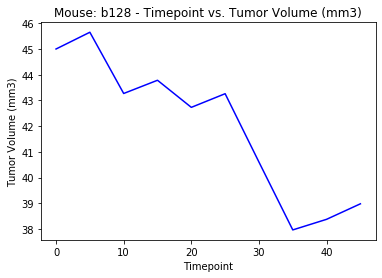

In [62]:
campomulin_mouse, = plt.plot(timepoint, tumor_volume, color="blue")
plt.title("Mouse: b128 - Timepoint vs. Tumor Volume (mm3)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

plt.show()

In [49]:
capomulin_mice_df = mouse_data_df.loc[mouse_data_df["Drug Regimen"] == "Capomulin", :]
capomulin_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [50]:
mouse_id_df = capomulin_mice_df.groupby(['Mouse ID'])

mouse_id_df.count().head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b128,10,10,10,10,10,10,10
b742,10,10,10,10,10,10,10
f966,5,5,5,5,5,5,5
g288,10,10,10,10,10,10,10
g316,10,10,10,10,10,10,10


In [51]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_tumor = mouse_id_df["Tumor Volume (mm3)"].mean()
avg_tumor.head()

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
Name: Tumor Volume (mm3), dtype: float64

In [52]:
weight = mouse_id_df["Weight (g)"].mean()
weight.head()

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
Name: Weight (g), dtype: int64

In [53]:
summary_mouse_table_df = pd.DataFrame({"Average Tumor Volume (mm3)": avg_tumor,
                                        "Weight (g)": weight
})
summary_mouse_table_df.head()

,Average Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22


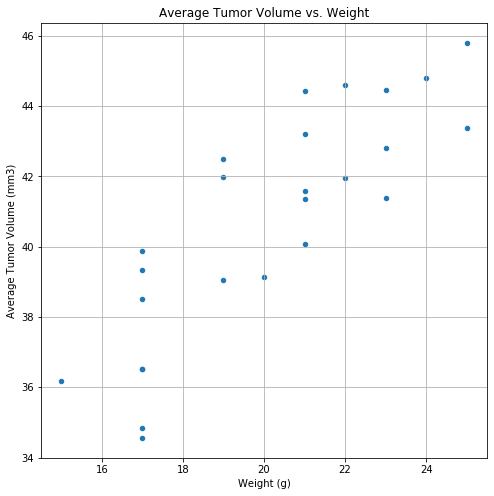

In [54]:
summary_mouse_table_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Average Tumor Volume vs. Weight")
plt.show()

In [55]:
# Calculate the correlation coefficient and linear regression model for mouse weight and 
# average tumor volume for the Capomulin regimen

tumor_volume = summary_mouse_table_df.iloc[:,0]
weight = summary_mouse_table_df.iloc[:,1]
correlation = st.pearsonr(tumor_volume,weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


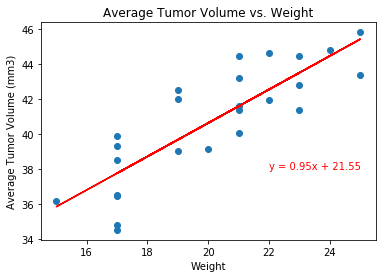

In [56]:
x_values = summary_mouse_table_df['Weight (g)']
y_values = summary_mouse_table_df['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,38),fontsize=10,color="red")

plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs. Weight")
plt.show()